<a href="https://colab.research.google.com/github/tanujkochar26/Abalone/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [81]:
data = pd.read_csv("/content/abalone.csv")

In [82]:
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [83]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Text(0, 0.5, 'Counts')

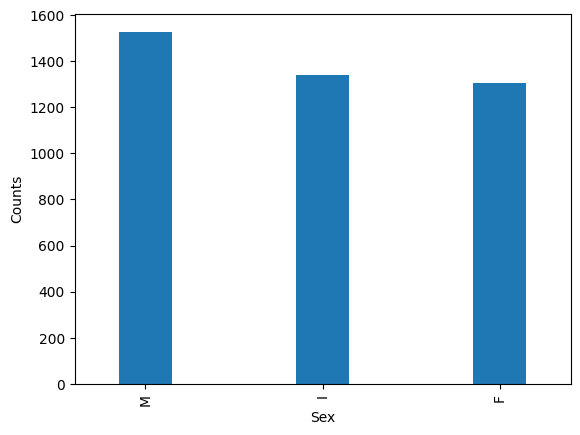

In [84]:
data["Sex"].value_counts().plot.bar(width=0.3)
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Counts",fontsize=10)

Text(0, 0.5, 'Average Rings')

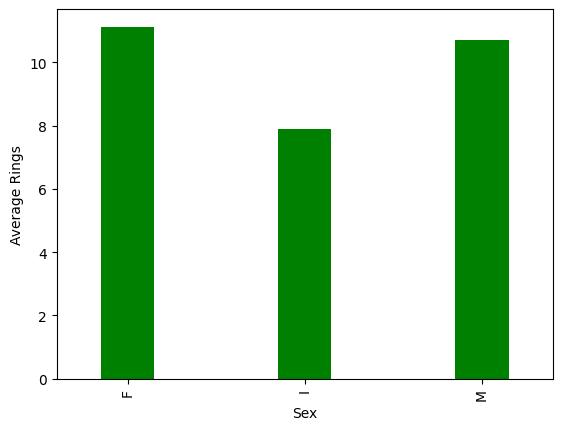

In [85]:
data.groupby('Sex')['Rings'].mean().plot.bar(color='green',width=0.3)
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Average Rings",fontsize=10)

<Axes: xlabel='Viscera weight', ylabel='Count'>

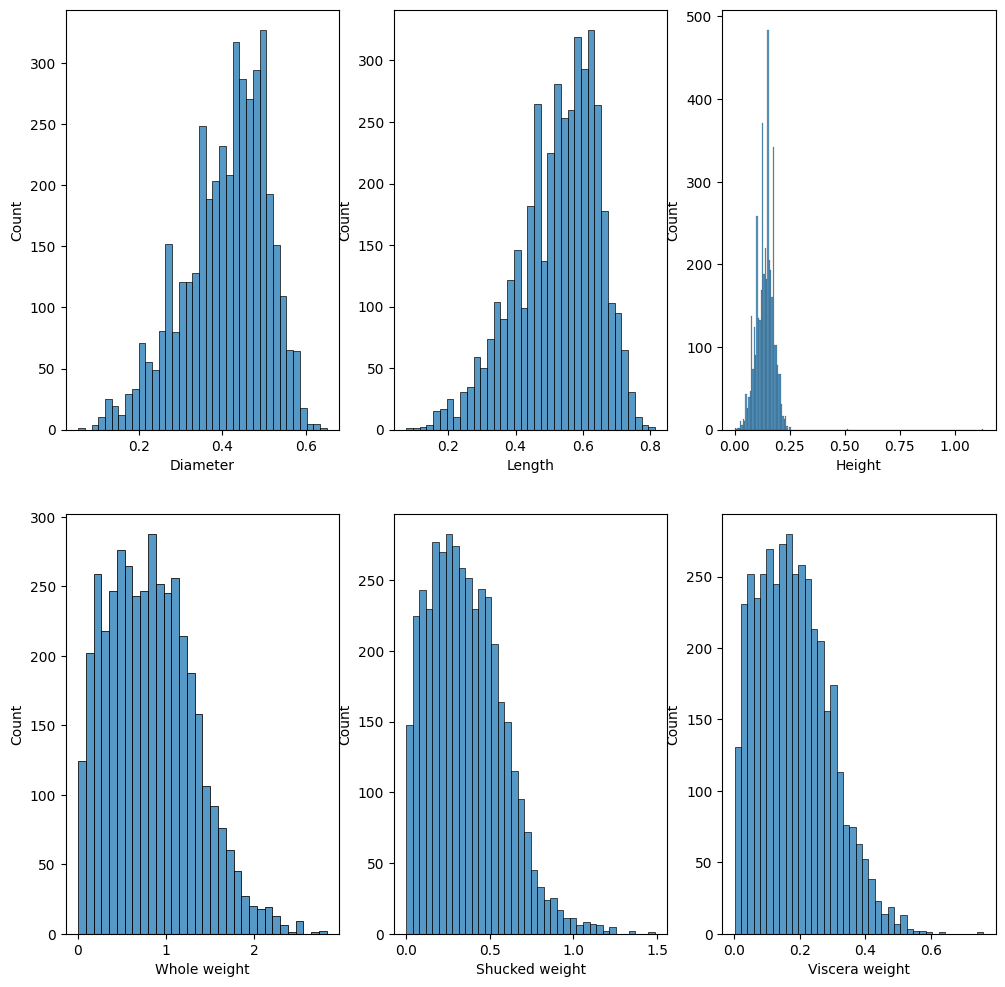

In [86]:
f, axs = plt.subplots(2, 3, figsize=(12, 12))
sns.histplot(data=data,x="Diameter", ax=axs[0][0])
sns.histplot(data=data,x="Length", ax=axs[0][1])
sns.histplot(data=data,x="Height", ax=axs[0][2])
sns.histplot(data=data,x="Whole weight", ax=axs[1][0])
sns.histplot(data=data,x="Shucked weight", ax=axs[1][1])
sns.histplot(data=data,x="Viscera weight", ax=axs[1][2])


Text(37.218444444444444, 0.5, 'Diameter')

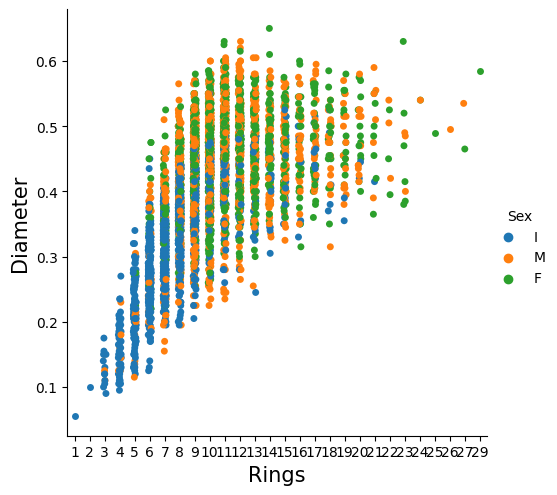

In [87]:
sns.catplot(x='Rings',y="Diameter",hue='Sex',data=data,)
plt.xlabel("Rings",fontsize=15)
plt.ylabel("Diameter",fontsize=15)

<ipython-input-88-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

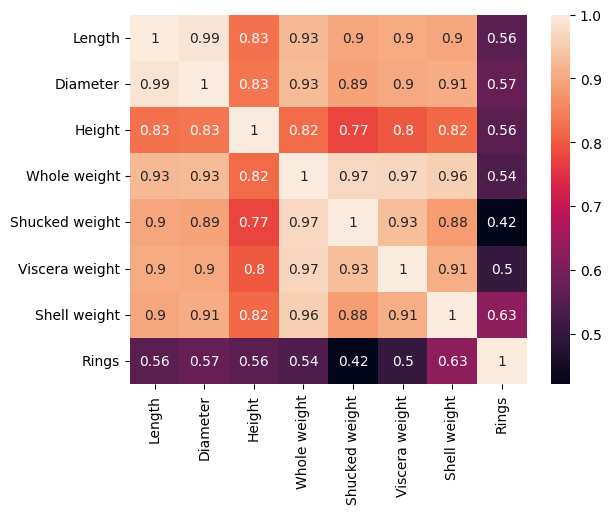

In [88]:
sns.heatmap(data.corr(),annot=True)

Text(37.218444444444444, 0.5, 'Shucked weight')

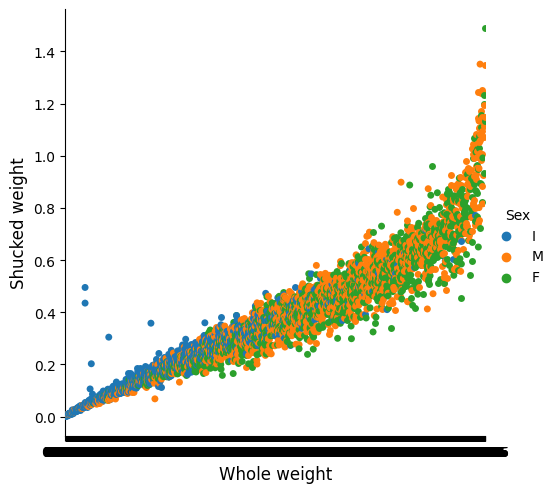

In [89]:
sns.catplot(x='Whole weight',y="Shucked weight",hue='Sex',data=data)
plt.xlabel("Whole weight",fontsize=12)
plt.ylabel("Shucked weight",fontsize=12)

Text(31.05461111111112, 0.5, 'Viscera weight')

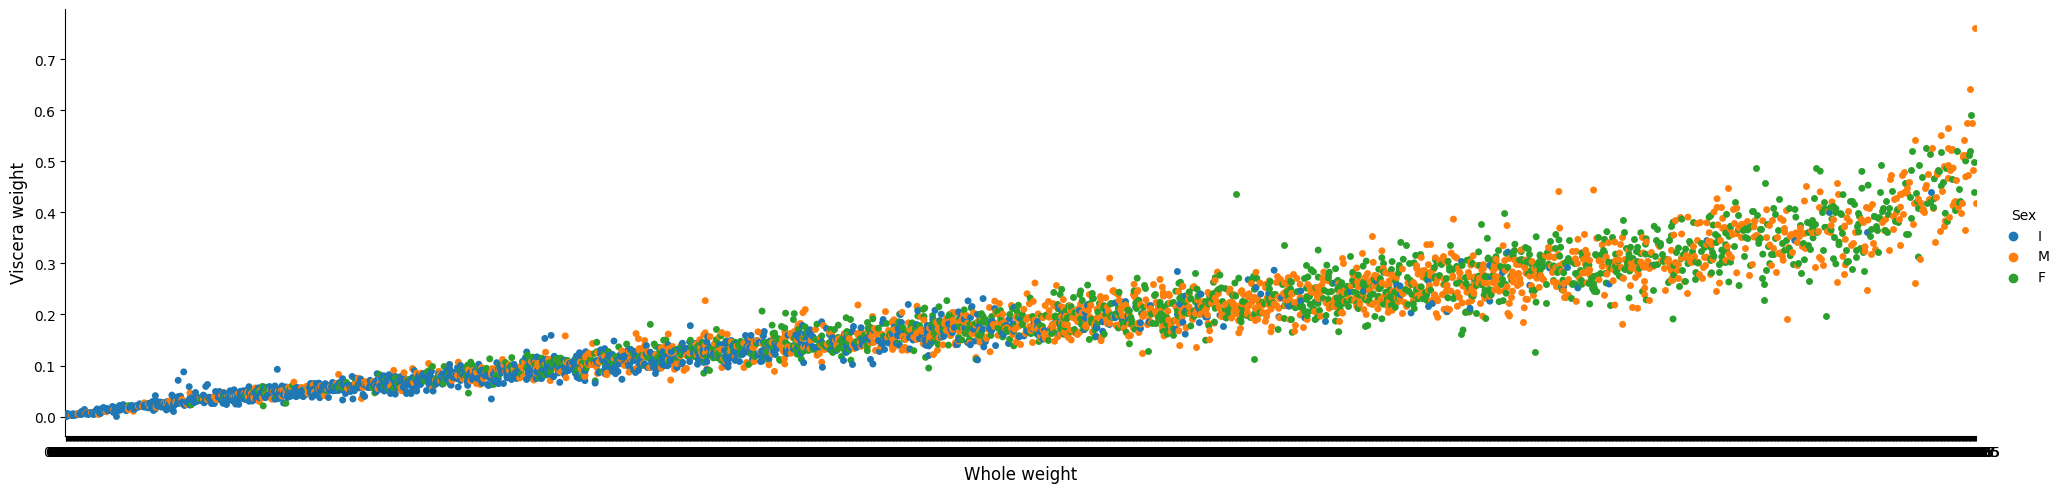

In [90]:
sns.catplot(data=data,x='Whole weight',y="Viscera weight",hue='Sex',aspect=4)
plt.xlabel("Whole weight",fontsize=12)
plt.ylabel("Viscera weight",fontsize=12)

In [91]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [92]:
data=pd.get_dummies(data,'Sex')

In [93]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [94]:
y=data["Rings"]
x=data.drop("Rings",axis=1)

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression


In [97]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

Mean Absolute Error for Our Linear Regression BaseLine Model


In [98]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

1.5742499003189792

Now moving with Root Mean Squared Error in our baseline model



In [99]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,y_pred)

5.007000839501097

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5250881092520304

Hyperparameter Tuning


In [101]:
from sklearn.model_selection import GridSearchCV
parameters={'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[-1,1,10,15]}

In [102]:
grid=GridSearchCV(lr,parameters,cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 10, 15]})

In [103]:
grid.best_estimator_

LinearRegression(fit_intercept=False, n_jobs=-1)

Hyperparameter Tuned Model

In [104]:
lr=LinearRegression(fit_intercept=False, n_jobs=-1)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [105]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

1.5754688278865472

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5253868694528048